# Classification 
Ideas to try 
- [] MinMax scaling?

In [1]:
# import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import scipy
from scipy.sparse.linalg import svds 
from scipy.stats import itemfreq

In [2]:
data = pd.read_csv("mirnas_all_nov21.txt", sep="\t")
labels = pd.read_csv("mirnas_all_labels_nov21.txt", sep="\t")

data=data.drop(['Unnamed: 0'], axis=1)
data.set_index('ID_REF')
data.head()

,ID_REF,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,...,GSM237966,GSM237967,GSM237968,GSM237969,GSM237970,GSM237972,GSM237973,GSM237974,GSM237977,GSM237978
0,1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,...,3739.4300,2809.7200,2350.390,4079.3500,7302.00000,2898.6400,3494.1600,5225.7500,5917.5400,4249.9400
1,1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,...,1205.6400,883.9270,1418.130,721.6150,641.33900,1009.4900,788.6240,1227.7000,662.1490,1315.5500
2,117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,...,89.1387,81.6689,366.327,151.8190,191.91400,134.4140,67.0623,104.0020,15.1112,119.9420
3,121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,...,787.3290,848.5340,1454.480,1142.3000,1099.31000,762.8810,408.8580,684.3200,612.0700,809.6950
4,1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,...,80.9794,30.6078,103.337,36.9773,5.61104,92.5094,30.6197,17.8383,11.1367,93.9161


In [4]:
print(labels)

     Dataset_id  Class_id                                         Class_name  \
0      GSE11078         1  metastasis tumor of breast cancer lung metastasis   
1      GSE11078         1  metastasis tumor of breast cancer lung metastasis   
2      GSE11078         1  metastasis tumor of breast cancer lung metastasis   
3      GSE11078         1  metastasis tumor of breast cancer lung metastasis   
4      GSE11078         1  metastasis tumor of breast cancer lung metastasis   
...         ...       ...                                                ...   
1489    GSE9348         2                   primary tumor without metastasis   
1490    GSE9348         2                   primary tumor without metastasis   
1491    GSE9348         2                   primary tumor without metastasis   
1492    GSE9348         2                   primary tumor without metastasis   
1493    GSE9348         2                   primary tumor without metastasis   

      Sample_id        Cancer_type Canc

In [3]:
# turn dataset into numpy array; will need these to recreate data frame later
data_heading=data.columns
id_refs=data['ID_REF']

np_data = np.array(data)[:,1:].astype(float)
np_data.shape

(54675, 1494)

In [4]:
# tiffany's PCA, uses SVD
def PCA(PCA_K, input_data):

    total_dim, sample_n = input_data.shape

    data_mean = np.reshape(np.mean(input_data, axis=1),(total_dim,1))
    data_demean = np.subtract(input_data, data_mean)

    u, s, vt = svds(data_demean, k=PCA_K)

    PCA_weights = np.matmul(np.transpose(u), data_demean)
    
    return PCA_weights, u, s, data_mean


In [5]:
# Basically need to change what np_data is

lungs=labels[labels['Metastasis_site']=='lung']['Sample_id']
lung_labels=labels[labels['Metastasis_site']=='lung']['Primary_site']

lung_data = data[lungs]

In [42]:
lung_data.head()

,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM352095,GSM352114,GSM352127,GSM352132,GSM359477,...,GSM2263282,GSM2263284,GSM2263287,GSM2263288,GSM2263292,GSM2263294,GSM2263295,GSM2263298,GSM2263299,GSM2263302
0,10.022909,9.818693,9.647424,9.841938,9.190691,11.942972,12.145630,11.734945,12.049945,8.162700,...,8.647694,9.525532,9.248846,9.306287,9.145314,8.530944,8.081856,8.434029,8.726478,8.131775
1,6.411660,5.665370,5.613482,5.190008,5.180046,9.124514,8.129902,7.521694,9.248112,7.890935,...,6.397119,6.619812,6.722360,6.426902,6.922576,7.025303,6.750538,6.223376,6.846281,6.917279
2,6.181633,5.700626,5.786576,5.237599,6.131352,7.832843,8.401506,7.766366,8.001030,5.349770,...,7.384940,6.108547,7.219937,6.434265,6.027906,7.149351,7.596471,7.694820,6.647473,7.124813
3,7.436633,7.053211,7.258615,7.562595,7.330315,9.293999,9.672572,9.791220,9.320542,8.129856,...,9.614226,9.309642,9.291900,9.807605,9.701834,8.903797,8.225796,8.990390,9.270007,10.512534
4,2.887094,3.000947,3.121344,3.086248,3.480671,4.545640,4.658521,4.812589,4.745899,2.195735,...,3.487416,3.369951,3.571586,3.324024,3.689759,3.515181,3.414399,3.292489,3.466469,3.369423


In [54]:
np_data = np.array(lung_data)[:,:].astype(float)

In [55]:
np_data.shape

(54675, 103)

In [56]:
# #s[300:373]
# temp = np_data[:1000,:1000]
# temp.shape

In [57]:
weights, u, s, mean = PCA(100, np_data)

In [58]:
# pca_data = np.matmul(np.transpose(u[:,300:373]), np.subtract(np_data,mean))
# pca_data = np.matmul(np.transpose(u), np.subtract(np_data,mean))

In [59]:
weights.shape

(100, 103)

### After playing with the number of features, for random forest, using 30 features produces the best result

In [60]:
pca_data = np.matmul(np.transpose(u[:,70:]), np.subtract(np_data,mean))

In [61]:
pca_data.shape

(30, 103)

## Split into train/test

In [62]:
pd_pca=pd.DataFrame(pca_data)

In [63]:
# data_heading=data.columns
# id_refs=data['ID_REF']

In [64]:
# idk i just realized we dont need to make it into a pandas data frame again lol 
pd_pca.columns=lung_data.columns[1:]
pd_pca['ID_REF'] = id_refs

ValueError: Length mismatch: Expected axis has 103 elements, new values have 102 elements

In [17]:
pd_pca.head()

,GSM279974,GSM279975,GSM279977,GSM279978,GSM352095,GSM352114,GSM352127,GSM352132,GSM359477,GSM359478,...,GSM2263284,GSM2263287,GSM2263288,GSM2263292,GSM2263294,GSM2263295,GSM2263298,GSM2263299,GSM2263302,ID_REF
0,-0.401087,10.598072,-0.939094,3.566807,-27.123538,-29.543356,-9.478082,-21.747829,84.177215,65.337357,...,33.831482,42.401741,36.026228,36.832872,35.139092,37.242588,37.890971,33.255908,21.239760,1007_s_at
1,67.111758,75.555435,66.861093,69.070920,-398.718115,-396.098497,-390.562556,-396.635086,165.531244,151.437059,...,-93.292071,-108.508993,-93.180930,-90.958962,-89.093411,-98.816499,-97.326917,-94.192293,-86.341791,1053_at
2,5.784552,5.050702,8.847930,11.891135,-16.316464,-20.629187,-20.107462,-19.609792,-1.351972,0.885325,...,-9.433478,-9.753803,-10.115771,-4.698363,-3.784993,-3.761507,-3.661248,-7.862866,-2.171137,117_at
3,0.148370,-5.275391,-1.756718,-6.737493,5.826543,9.716483,3.755398,4.650543,-9.808887,5.746883,...,4.027952,7.098473,8.490682,9.479645,3.124629,4.367049,5.808902,0.601274,3.596484,121_at
4,3.705249,2.975812,0.795524,4.046372,6.035779,2.973593,-3.552717,1.568011,5.187784,-3.843314,...,-7.809884,-5.245510,-4.781682,-8.095687,-9.305659,-6.714148,-9.180525,-10.679148,-11.781227,1255_g_at


In [18]:
#pd_pca.to_csv("mirnas_all_pca_500_88.txt", sep="\t")

In [65]:
# need data to be back in numpy to work with lolol
pca_data.shape

(30, 103)

In [66]:
# get labels 
# sample_labels=labels['Sample_label'].values

In [67]:
#sample_labels = ['Normal' if x=='Metastasis Normal' or x=='Primary Normal' else x for x in labels['Sample_label'].values]
#sample_labels=np.asarray(sample_labels)

In [68]:
sample_labels = lung_labels.values

In [69]:
len(sample_labels)

103

In [70]:
np.unique(sample_labels,return_counts=True)

(array(['breast', 'kindey', 'liver'], dtype=object), array([ 9, 79, 15]))

In [71]:
# train test split 
np.random.seed(69)
ii = np.random.rand(len(pca_data[0])) < 0.7 
print(len(ii))

# np_data = data.values
# np_types = types.values
# np_labels = labels.values

# # scaling data 
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# np_data_min_max = min_max_scaler.fit_transform(np_data)

train = pca_data[:,ii]
test = pca_data[:,~ii]

train_labels = sample_labels[ii]
test_labels = sample_labels[~ii]

gsms=data.columns[1:]
train_gsm = gsms[ii]
test_gsm=gsms[~ii]
# train = np_data[ii]
# test = np_data[~ii]

# pand_train = data[ii]
# pand_test = data[~ii]

103


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1494 but corresponding boolean dimension is 103

In [19]:
def compute_confusion_matrix(true, pred):
    '''
    Compute a confusion matrix using numpy for two np.arrays
    true and pred.

    Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

    https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
    '''
    # lol map of indicies for non-numeric classes
    count=0
    idx={}
    for i in np.unique(true):
        idx[i]=count
        count+=1
        
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[idx[true[i]]][idx[pred[i]]] += 1
        
    print("Accuracy: " + str(np.trace(result)/len(true)))

    return result

In [20]:
# idk just using this for now...can make our own CM stuff later 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
rfmodel = RandomForestClassifier(n_estimators=100)
rf = rfmodel.fit(train.T, train_labels)

rf_pred = rf.predict(test.T)

# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(test_labels, rf_pred))
rf_cm = confusion_matrix(test_labels, rf_pred,)

y_true = pd.Series(test_labels)
y_pred = pd.Series(rf_pred)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy:  0.8786516853932584


Predicted,Metastasis Tumor,Normal,Primary Tumor,All
True,,,,
Metastasis Tumor,47,0,28,75
Normal,0,15,10,25
Primary Tumor,16,0,329,345
All,63,15,367,445


Accuracy: 0.8786516853932584


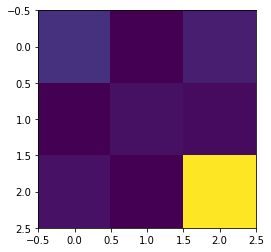

In [62]:
cm=compute_confusion_matrix(test_labels,rf_pred)
plt.imshow(cm)

In [63]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(test_labels, rf_pred)
print("kappa: ")
print(kappa)

kappa: 
0.6376112200271452
